# Formatting runs for paper plots

## Utilitaries

In [1]:
# Imports and utility functions
using JLD2, Plots, StatsBase, ConvexHullPricing
const UT = ConvexHullPricing.Utilitaries
const OPT = ConvexHullPricing.Optimizer
RANGE = 0:1:900
function refine_it(valuevec, timevec)
    new_values = Float64[]
    for t in RANGE
        push!(new_values, valuevec[searchsortedfirst(timevec, t)])
    end
    return new_values
end
function get_relative_error(array, idx)
    precision = Float64[]
    for elt in array
        push!(precision, 100 * ((elt - 1500)/abs(Opts[idx])))
    end
    return precision
end
function get_relative_error_CA(array, idx)
    precision = Float64[]
    for elt in array
        push!(precision, 100 * (elt/abs(OptsCA[idx])))
    end
    return precision
end
function make_it_monotone(array)
    new_array = Float64[]
    push!(new_array, array[1])
    for elt in array[2:end]
        if elt < minimum(new_array)
            push!(new_array, elt)
        else
            push!(new_array, minimum(new_array))
        end
    end
    return new_array
end

Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-03
Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-03


make_it_monotone (generic function with 1 method)

 ## Uploading data

In [2]:
BEinstances = []
for file in readdir("..\\data\\belgian"; join=true)
    push!(BEinstances, UT.load_data(file))
end
Opts = Float64[]
for (idx, instance) in enumerate(BEinstances)
    ObjM = UT.Matching(instance).Obj
    Optimal = maximum(load_object("december\\UltraOptimalRunsBE.jld2")[idx][3])
    push!(Opts, ObjM - Optimal)
end

In [3]:
CAinstances = []
for file in readdir("..\\data\\ca"; join=true)
    push!(CAinstances, UT.load_data(file))
end
OptsCA = Float64[]
for (idx, instance) in enumerate(CAinstances)
    ObjM = UT.Matching(instance).Obj
    Optimal = maximum(load_object("december\\UltraOptimalRunsCA.jld2")[idx][3])
    push!(OptsCA, ObjM - Optimal)
end


## Load BE runs and aggregate them

In [8]:
BE1BPLMtime, BE1BPLMval = load_object("try\\belgian1BPLM")
BE2BPLMtime, BE2BPLMval = load_object("try\\belgian2BPLM")
BE3BPLMtime, BE3BPLMval = load_object("try\\belgian3BPLM")
BE4BPLMtime, BE4BPLMval = load_object("try\\belgian4BPLM")
BE5BPLMtime, BE5BPLMval = load_object("try\\belgian5BPLM")
BE6BPLMtime, BE6BPLMval = load_object("try\\belgian6BPLM")
BE7BPLMtime, BE7BPLMval = load_object("try\\belgian7BPLM")
BE8BPLMtime, BE8BPLMval = load_object("try\\belgian8BPLM")
BE1BPLMtime = BE1BPLMtime[2:end]
BE2BPLMtime = BE2BPLMtime[2:end]
BE3BPLMtime = BE3BPLMtime[2:end]
BE4BPLMtime = BE4BPLMtime[2:end]
BE5BPLMtime = BE5BPLMtime[2:end]
BE6BPLMtime = BE6BPLMtime[2:end]
BE7BPLMtime = BE7BPLMtime[2:end]
BE8BPLMtime = BE8BPLMtime[2:end]

BE1BPLMval = get_relative_error(refine_it(BE1BPLMval, BE1BPLMtime), 1)
BE2BPLMval = get_relative_error(refine_it(BE2BPLMval, BE2BPLMtime), 2)
BE3BPLMval = get_relative_error(refine_it(BE3BPLMval, BE3BPLMtime), 3)
BE4BPLMval = get_relative_error(refine_it(BE4BPLMval, BE4BPLMtime), 4)
BE5BPLMval = get_relative_error(refine_it(BE5BPLMval, BE5BPLMtime), 5)
BE6BPLMval = get_relative_error(refine_it(BE6BPLMval, BE6BPLMtime), 6)
BE7BPLMval = get_relative_error(refine_it(BE7BPLMval, BE7BPLMtime), 7)
BE8BPLMval = get_relative_error(refine_it(BE8BPLMval, BE8BPLMtime), 8)
@info "Loading done"
matrixBPLM = [BE2BPLMval, BE3BPLMval, BE4BPLMval, BE5BPLMval, BE6BPLMval, BE7BPLMval, BE8BPLMval]
plotmatrixBPLM = [BE1BPLMval, BE2BPLMval, BE3BPLMval, BE4BPLMval, BE5BPLMval, BE6BPLMval, BE7BPLMval, BE8BPLMval]
aggregateBPLM = mean(matrixBPLM)
@info "Aggregated Belgian BPLM"

┌ Info: Loading done
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:26
┌ Info: Aggregated Belgian BPLM
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:30


In [5]:
BE1RSGtime, BE1RSGval = load_object("december\\belgian1RSG")
BE2RSGtime, BE2RSGval = load_object("december\\belgian2RSG")
BE3RSGtime, BE3RSGval = load_object("december\\belgian3RSG")
BE4RSGtime, BE4RSGval = load_object("december\\belgian4RSG")
BE5RSGtime, BE5RSGval = load_object("december\\belgian5RSG")
BE6RSGtime, BE6RSGval = load_object("december\\belgian6RSG")
BE7RSGtime, BE7RSGval = load_object("december\\belgian7RSG")
BE8RSGtime, BE8RSGval = load_object("december\\belgian8RSG")
BE1RSGtime = BE1RSGtime[2:end]
BE2RSGtime = BE2RSGtime[2:end]
BE3RSGtime = BE3RSGtime[2:end]
BE4RSGtime = BE4RSGtime[2:end]
BE5RSGtime = BE5RSGtime[2:end]
BE6RSGtime = BE6RSGtime[2:end]
BE7RSGtime = BE7RSGtime[2:end]
BE8RSGtime = BE8RSGtime[2:end]

BE1RSGval = get_relative_error(refine_it(BE1RSGval, BE1RSGtime), 1)
BE2RSGval = get_relative_error(refine_it(BE2RSGval, BE2RSGtime), 2)
BE3RSGval = get_relative_error(refine_it(BE3RSGval, BE3RSGtime), 3)
BE4RSGval = get_relative_error(refine_it(BE4RSGval, BE4RSGtime), 4)
BE5RSGval = get_relative_error(refine_it(BE5RSGval, BE5RSGtime), 5)
BE6RSGval = get_relative_error(refine_it(BE6RSGval, BE6RSGtime), 6)
BE7RSGval = get_relative_error(refine_it(BE7RSGval, BE7RSGtime), 7)
BE8RSGval = get_relative_error(refine_it(BE8RSGval, BE8RSGtime), 8)
@info "Loading done"
matrixRSG = [BE2RSGval, BE3RSGval, BE4RSGval, BE5RSGval, BE6RSGval, BE7RSGval, BE8RSGval]
plotmatrixRSG = [BE1RSGval, BE2RSGval, BE3RSGval, BE4RSGval, BE5RSGval, BE6RSGval, BE7RSGval, BE8RSGval]
aggregateRSG = mean(matrixRSG)
@info "Aggregated Belgian RSG"

┌ Info: Loading done
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:26
┌ Info: Aggregated Belgian RSG
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:30


In [4]:
BE1BLMtime, BE1BLMval = load_object("december\\belgian1BLM")
BE2BLMtime, BE2BLMval = load_object("december\\belgian2BLM")
BE3BLMtime, BE3BLMval = load_object("december\\belgian3BLM")
BE4BLMtime, BE4BLMval = load_object("december\\belgian4BLM")
BE5BLMtime, BE5BLMval = load_object("december\\belgian5BLM")
BE6BLMtime, BE6BLMval = load_object("december\\belgian6BLM")
BE7BLMtime, BE7BLMval = load_object("december\\belgian7BLM")
BE8BLMtime, BE8BLMval = load_object("december\\belgian8BLM")
BE1BLMtime = BE1BLMtime[2:end]
BE2BLMtime = BE2BLMtime[2:end]
BE3BLMtime = BE3BLMtime[2:end]
BE4BLMtime = BE4BLMtime[2:end]
BE5BLMtime = BE5BLMtime[2:end]
BE6BLMtime = BE6BLMtime[2:end]
BE7BLMtime = BE7BLMtime[2:end]
BE8BLMtime = BE8BLMtime[2:end]

BE1BLMval = get_relative_error(refine_it(BE1BLMval, BE1BLMtime), 1)
BE2BLMval = get_relative_error(refine_it(BE2BLMval, BE2BLMtime), 2)
BE3BLMval = get_relative_error(refine_it(BE3BLMval, BE3BLMtime), 3)
BE4BLMval = get_relative_error(refine_it(BE4BLMval, BE4BLMtime), 4)
BE5BLMval = get_relative_error(refine_it(BE5BLMval, BE5BLMtime), 5)
BE6BLMval = get_relative_error(refine_it(BE6BLMval, BE6BLMtime), 6)
BE7BLMval = get_relative_error(refine_it(BE7BLMval, BE7BLMtime), 7)
BE8BLMval = get_relative_error(refine_it(BE8BLMval, BE8BLMtime), 8)
@info "Loading done"
matrixBLM = [BE2BLMval, BE3BLMval, BE4BLMval, BE5BLMval, BE6BLMval, BE7BLMval, BE8BLMval]
plotmatrixBLM = [BE1BLMval, BE2BLMval, BE3BLMval, BE4BLMval, BE5BLMval, BE6BLMval, BE7BLMval, BE8BLMval]
aggregateBLM = mean(matrixBLM)
@info "Aggregated Belgian BLM"

┌ Info: Loading done
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:26
┌ Info: Aggregated Belgian BLM
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:30


In [6]:
BE1CGtime, BE1CGval = load_object("december\\belgian1CG")
BE2CGtime, BE2CGval = load_object("december\\belgian2CG")
BE3CGtime, BE3CGval = load_object("december\\belgian3CG")
BE4CGtime, BE4CGval = load_object("december\\belgian4CG")
BE5CGtime, BE5CGval = load_object("december\\belgian5CG")
BE6CGtime, BE6CGval = load_object("december\\belgian6CG")
BE7CGtime, BE7CGval = load_object("december\\belgian7CG")
BE8CGtime, BE8CGval = load_object("december\\belgian8CG")
BE1CGtime = BE1CGtime[2:end]
BE2CGtime = BE2CGtime[2:end]
BE3CGtime = BE3CGtime[2:end]
BE4CGtime = BE4CGtime[2:end]
BE5CGtime = BE5CGtime[2:end]
BE6CGtime = BE6CGtime[2:end]
BE7CGtime = BE7CGtime[2:end]
BE8CGtime = BE8CGtime[2:end]

BE1CGval = get_relative_error(refine_it(BE1CGval, BE1CGtime), 1)
BE2CGval = get_relative_error(refine_it(BE2CGval, BE2CGtime), 2)
BE3CGval = get_relative_error(refine_it(BE3CGval, BE3CGtime), 3)
BE4CGval = get_relative_error(refine_it(BE4CGval, BE4CGtime), 4)
BE5CGval = get_relative_error(refine_it(BE5CGval, BE5CGtime), 5)
BE6CGval = get_relative_error(refine_it(BE6CGval, BE6CGtime), 6)
BE7CGval = get_relative_error(refine_it(BE7CGval, BE7CGtime), 7)
BE8CGval = get_relative_error(refine_it(BE8CGval, BE8CGtime), 8)
@info "Loading done"
matrixCG = [BE1CGval, BE2CGval, BE3CGval, BE4CGval, BE5CGval, BE6CGval, BE7CGval, BE8CGval]
plotmatrixCG = [BE1CGval, BE2CGval, BE3CGval, BE4CGval, BE5CGval, BE6CGval, BE7CGval, BE8CGval]
aggregateCG = mean(matrixCG)
@info "Aggregated Belgian CG"

┌ Info: Loading done
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:26
┌ Info: Aggregated Belgian CG
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:30


In [7]:
BE1BPLMtime, BE1BPLMval = load_object("december\\belgian1BPLM")
BE2BPLMtime, BE2BPLMval = load_object("december\\belgian2BPLM")
BE3BPLMtime, BE3BPLMval = load_object("december\\belgian3BPLM")
BE4BPLMtime, BE4BPLMval = load_object("december\\belgian4BPLM")
BE5BPLMtime, BE5BPLMval = load_object("december\\belgian5BPLM")
BE6BPLMtime, BE6BPLMval = load_object("december\\belgian6BPLM")
BE7BPLMtime, BE7BPLMval = load_object("december\\belgian7BPLM")
BE8BPLMtime, BE8BPLMval = load_object("december\\belgian8BPLM")
BE1BPLMtime = BE1BPLMtime[2:end]
BE2BPLMtime = BE2BPLMtime[2:end]
BE3BPLMtime = BE3BPLMtime[2:end]
BE4BPLMtime = BE4BPLMtime[2:end]
BE5BPLMtime = BE5BPLMtime[2:end]
BE6BPLMtime = BE6BPLMtime[2:end]
BE7BPLMtime = BE7BPLMtime[2:end]
BE8BPLMtime = BE8BPLMtime[2:end]

BE1BPLMval = get_relative_error(refine_it(BE1BPLMval, BE1BPLMtime), 1)
BE2BPLMval = get_relative_error(refine_it(BE2BPLMval, BE2BPLMtime), 2)
BE3BPLMval = get_relative_error(refine_it(BE3BPLMval, BE3BPLMtime), 3)
BE4BPLMval = get_relative_error(refine_it(BE4BPLMval, BE4BPLMtime), 4)
BE5BPLMval = get_relative_error(refine_it(BE5BPLMval, BE5BPLMtime), 5)
BE6BPLMval = get_relative_error(refine_it(BE6BPLMval, BE6BPLMtime), 6)
BE7BPLMval = get_relative_error(refine_it(BE7BPLMval, BE7BPLMtime), 7)
BE8BPLMval = get_relative_error(refine_it(BE8BPLMval, BE8BPLMtime), 8)
@info "Loading done"
matrixBPLM = [BE2BPLMval, BE3BPLMval, BE4BPLMval, BE5BPLMval, BE6BPLMval, BE7BPLMval, BE8BPLMval]
plotmatrixBPLM = [BE1BPLMval, BE2BPLMval, BE3BPLMval, BE4BPLMval, BE5BPLMval, BE6BPLMval, BE7BPLMval, BE8BPLMval]
aggregateBPLM = mean(matrixBPLM)
@info "Aggregated Belgian BPLM"

┌ Info: Loading done
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:26
┌ Info: Aggregated Belgian BPLM
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:30


In [9]:
BE1DAtime, BE1DAval = load_object("december\\belgian1DA")
BE2DAtime, BE2DAval = load_object("december\\belgian2DA")
BE3DAtime, BE3DAval = load_object("december\\belgian3DA")
BE4DAtime, BE4DAval = load_object("december\\belgian4DA")
BE5DAtime, BE5DAval = load_object("december\\belgian5DA")
BE6DAtime, BE6DAval = load_object("december\\belgian6DA")
BE7DAtime, BE7DAval = load_object("december\\belgian7DA")
BE8DAtime, BE8DAval = load_object("december\\belgian8DA")
BE1DAtime = BE1DAtime[2:end]
BE2DAtime = BE2DAtime[2:end]
BE3DAtime = BE3DAtime[2:end]
BE4DAtime = BE4DAtime[2:end]
BE5DAtime = BE5DAtime[2:end]
BE6DAtime = BE6DAtime[2:end]
BE7DAtime = BE7DAtime[2:end]
BE8DAtime = BE8DAtime[2:end]

BE1DAval = get_relative_error(refine_it(BE1DAval, BE1DAtime), 1)
BE2DAval = get_relative_error(refine_it(BE2DAval, BE2DAtime), 2)
BE3DAval = get_relative_error(refine_it(BE3DAval, BE3DAtime), 3)
BE4DAval = get_relative_error(refine_it(BE4DAval, BE4DAtime), 4)
BE5DAval = get_relative_error(refine_it(BE5DAval, BE5DAtime), 5)
BE6DAval = get_relative_error(refine_it(BE6DAval, BE6DAtime), 6)
BE7DAval = get_relative_error(refine_it(BE7DAval, BE7DAtime), 7)
BE8DAval = get_relative_error(refine_it(BE8DAval, BE8DAtime), 8)
@info "Loading done"
matrixDA = [BE2DAval, BE3DAval, BE4DAval, BE5DAval, BE6DAval, BE7DAval, BE8DAval]
plotmatrixDA = [BE1DAval, BE2DAval, BE3DAval, BE4DAval, BE5DAval, BE6DAval, BE7DAval, BE8DAval]
aggregateDA = mean(matrixDA)
@info "Aggregated Belgian DA"

┌ Info: Loading done
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:26
┌ Info: Aggregated Belgian DA
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:30


In [10]:
BE1DOWGtime, BE1DOWGval = load_object("december\\belgian1DOWG")
BE2DOWGtime, BE2DOWGval = load_object("december\\belgian2DOWG")
BE3DOWGtime, BE3DOWGval = load_object("december\\belgian3DOWG")
BE4DOWGtime, BE4DOWGval = load_object("december\\belgian4DOWG")
BE5DOWGtime, BE5DOWGval = load_object("december\\belgian5DOWG")
BE6DOWGtime, BE6DOWGval = load_object("december\\belgian6DOWG")
BE7DOWGtime, BE7DOWGval = load_object("december\\belgian7DOWG")
BE8DOWGtime, BE8DOWGval = load_object("december\\belgian8DOWG")
BE1DOWGtime = BE1DOWGtime[2:end]
BE2DOWGtime = BE2DOWGtime[2:end]
BE3DOWGtime = BE3DOWGtime[2:end]
BE4DOWGtime = BE4DOWGtime[2:end]
BE5DOWGtime = BE5DOWGtime[2:end]
BE6DOWGtime = BE6DOWGtime[2:end]
BE7DOWGtime = BE7DOWGtime[2:end]
BE8DOWGtime = BE8DOWGtime[2:end]

BE1DOWGval = get_relative_error(refine_it(BE1DOWGval, BE1DOWGtime), 1)
BE2DOWGval = get_relative_error(refine_it(BE2DOWGval, BE2DOWGtime), 2)
BE3DOWGval = get_relative_error(refine_it(BE3DOWGval, BE3DOWGtime), 3)
BE4DOWGval = get_relative_error(refine_it(BE4DOWGval, BE4DOWGtime), 4)
BE5DOWGval = get_relative_error(refine_it(BE5DOWGval, BE5DOWGtime), 5)
BE6DOWGval = get_relative_error(refine_it(BE6DOWGval, BE6DOWGtime), 6)
BE7DOWGval = get_relative_error(refine_it(BE7DOWGval, BE7DOWGtime), 7)
BE8DOWGval = get_relative_error(refine_it(BE8DOWGval, BE8DOWGtime), 8)
@info "Loading done"
matrixDOWG = [BE2DOWGval, BE3DOWGval, BE4DOWGval, BE5DOWGval, BE6DOWGval, BE7DOWGval, BE8DOWGval]
plotmatrixDOWG = [BE1DOWGval, BE2DOWGval, BE3DOWGval, BE4DOWGval, BE5DOWGval, BE6DOWGval, BE7DOWGval, BE8DOWGval]
aggregateDOWG = mean(matrixDOWG)
@info "Aggregated Belgian DOWG"

┌ Info: Loading done
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:26
┌ Info: Aggregated Belgian DOWG
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:30


In [11]:
BE1ESTPOLtime, BE1ESTPOLval = load_object("december\\belgian1ESTPOL")
BE2ESTPOLtime, BE2ESTPOLval = load_object("december\\belgian2ESTPOL")
BE3ESTPOLtime, BE3ESTPOLval = load_object("december\\belgian3ESTPOL")
BE4ESTPOLtime, BE4ESTPOLval = load_object("december\\belgian4ESTPOL")
BE5ESTPOLtime, BE5ESTPOLval = load_object("december\\belgian5ESTPOL")
BE6ESTPOLtime, BE6ESTPOLval = load_object("december\\belgian6ESTPOL")
BE7ESTPOLtime, BE7ESTPOLval = load_object("december\\belgian7ESTPOL")
BE8ESTPOLtime, BE8ESTPOLval = load_object("december\\belgian8ESTPOL")
BE1ESTPOLtime = BE1ESTPOLtime[2:end]
BE2ESTPOLtime = BE2ESTPOLtime[2:end]
BE3ESTPOLtime = BE3ESTPOLtime[2:end]
BE4ESTPOLtime = BE4ESTPOLtime[2:end]
BE5ESTPOLtime = BE5ESTPOLtime[2:end]
BE6ESTPOLtime = BE6ESTPOLtime[2:end]
BE7ESTPOLtime = BE7ESTPOLtime[2:end]
BE8ESTPOLtime = BE8ESTPOLtime[2:end]

BE1ESTPOLval = get_relative_error(refine_it(BE1ESTPOLval, BE1ESTPOLtime), 1)
BE2ESTPOLval = get_relative_error(refine_it(BE2ESTPOLval, BE2ESTPOLtime), 2)
BE3ESTPOLval = get_relative_error(refine_it(BE3ESTPOLval, BE3ESTPOLtime), 3)
BE4ESTPOLval = get_relative_error(refine_it(BE4ESTPOLval, BE4ESTPOLtime), 4)
BE5ESTPOLval = get_relative_error(refine_it(BE5ESTPOLval, BE5ESTPOLtime), 5)
BE6ESTPOLval = get_relative_error(refine_it(BE6ESTPOLval, BE6ESTPOLtime), 6)
BE7ESTPOLval = get_relative_error(refine_it(BE7ESTPOLval, BE7ESTPOLtime), 7)
BE8ESTPOLval = get_relative_error(refine_it(BE8ESTPOLval, BE8ESTPOLtime), 8)
@info "Loading done"
matrixESTPOL = [BE2ESTPOLval, BE3ESTPOLval, BE4ESTPOLval, BE5ESTPOLval, BE6ESTPOLval, BE7ESTPOLval, BE8ESTPOLval]
plotmatrixESTPOL = [BE1ESTPOLval, BE2ESTPOLval, BE3ESTPOLval, BE4ESTPOLval, BE5ESTPOLval, BE6ESTPOLval, BE7ESTPOLval, BE8ESTPOLval]
aggregateESTPOL = mean(matrixESTPOL)
@info "Aggregated Belgian ESTPOL"

┌ Info: Loading done
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:26
┌ Info: Aggregated Belgian ESTPOL
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:30


In [12]:
BE1SUBGtime, BE1SUBGval = load_object("december\\belgian1SUBG")
BE2SUBGtime, BE2SUBGval = load_object("december\\belgian2SUBG")
BE3SUBGtime, BE3SUBGval = load_object("december\\belgian3SUBG")
BE4SUBGtime, BE4SUBGval = load_object("december\\belgian4SUBG")
BE5SUBGtime, BE5SUBGval = load_object("december\\belgian5SUBG")
BE6SUBGtime, BE6SUBGval = load_object("december\\belgian6SUBG")
BE7SUBGtime, BE7SUBGval = load_object("december\\belgian7SUBG")
BE8SUBGtime, BE8SUBGval = load_object("december\\belgian8SUBG")
BE1SUBGtime = BE1SUBGtime[2:end]
BE2SUBGtime = BE2SUBGtime[2:end]
BE3SUBGtime = BE3SUBGtime[2:end]
BE4SUBGtime = BE4SUBGtime[2:end]
BE5SUBGtime = BE5SUBGtime[2:end]
BE6SUBGtime = BE6SUBGtime[2:end]
BE7SUBGtime = BE7SUBGtime[2:end]
BE8SUBGtime = BE8SUBGtime[2:end]

BE1SUBGval = get_relative_error(refine_it(BE1SUBGval, BE1SUBGtime), 1)
BE2SUBGval = get_relative_error(refine_it(BE2SUBGval, BE2SUBGtime), 2)
BE3SUBGval = get_relative_error(refine_it(BE3SUBGval, BE3SUBGtime), 3)
BE4SUBGval = get_relative_error(refine_it(BE4SUBGval, BE4SUBGtime), 4)
BE5SUBGval = get_relative_error(refine_it(BE5SUBGval, BE5SUBGtime), 5)
BE6SUBGval = get_relative_error(refine_it(BE6SUBGval, BE6SUBGtime), 6)
BE7SUBGval = get_relative_error(refine_it(BE7SUBGval, BE7SUBGtime), 7)
BE8SUBGval = get_relative_error(refine_it(BE8SUBGval, BE8SUBGtime), 8)
@info "Loading done"
matrixSUBG = [BE2SUBGval, BE3SUBGval, BE4SUBGval, BE5SUBGval, BE6SUBGval, BE7SUBGval, BE8SUBGval]
plotmatrixSUBG = [BE1SUBGval, BE2SUBGval, BE3SUBGval, BE4SUBGval, BE5SUBGval, BE6SUBGval, BE7SUBGval, BE8SUBGval]
aggregateSUBG = mean(matrixSUBG)
@info "Aggregated Belgian SUBG"

┌ Info: Loading done
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:26
┌ Info: Aggregated Belgian SUBG
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:30


## Load CA runs and aggregate them

In [97]:
CA1BLMtime, CA1BLMval   = load_object("december\\Californian1BLM")
CA2BLMtime, CA2BLMval   = load_object("december\\Californian2BLM")
CA3BLMtime, CA3BLMval   = load_object("december\\Californian3BLM")
CA4BLMtime, CA4BLMval   = load_object("december\\Californian4BLM")
CA5BLMtime, CA5BLMval   = load_object("december\\Californian5BLM")
CA6BLMtime, CA6BLMval   = load_object("december\\Californian6BLM")
CA7BLMtime, CA7BLMval   = load_object("december\\Californian7BLM")
CA8BLMtime, CA8BLMval   = load_object("december\\Californian8BLM")
CA9BLMtime, CA9BLMval   = load_object("december\\Californian9BLM")
CA10BLMtime, CA10BLMval = load_object("december\\Californian10BLM")
CA11BLMtime, CA11BLMval = load_object("december\\Californian11BLM")
CA12BLMtime, CA12BLMval = load_object("december\\Californian12BLM")
CA13BLMtime, CA13BLMval = load_object("december\\Californian13BLM")
CA14BLMtime, CA14BLMval = load_object("december\\Californian14BLM")
CA15BLMtime, CA15BLMval = load_object("december\\Californian15BLM")
CA16BLMtime, CA16BLMval = load_object("december\\Californian16BLM")
CA17BLMtime, CA17BLMval = load_object("december\\Californian17BLM")
CA18BLMtime, CA18BLMval = load_object("december\\Californian18BLM")
CA19BLMtime, CA19BLMval = load_object("december\\Californian19BLM")
CA20BLMtime, CA20BLMval = load_object("december\\Californian20BLM")
CA1BLMtime = CA1BLMtime[2:end]
CA2BLMtime = CA2BLMtime[2:end]
CA3BLMtime = CA3BLMtime[2:end]
CA4BLMtime = CA4BLMtime[2:end]
CA5BLMtime = CA5BLMtime[2:end]
CA6BLMtime = CA6BLMtime[2:end]
CA7BLMtime = CA7BLMtime[2:end]
CA8BLMtime = CA8BLMtime[2:end]
CA9BLMtime = CA9BLMtime[2:end]
CA10BLMtime = CA10BLMtime[2:end]
CA11BLMtime = CA11BLMtime[2:end]
CA12BLMtime = CA12BLMtime[2:end]
CA13BLMtime = CA13BLMtime[2:end]
CA14BLMtime = CA14BLMtime[2:end]
CA15BLMtime = CA15BLMtime[2:end]
CA16BLMtime = CA16BLMtime[2:end]
CA17BLMtime = CA17BLMtime[2:end]
CA18BLMtime = CA18BLMtime[2:end]
CA19BLMtime = CA19BLMtime[2:end]
CA20BLMtime = CA20BLMtime[2:end]
CA1BLMval = get_relative_error_CA(refine_it(CA1BLMval, CA1BLMtime), 1)
CA2BLMval = get_relative_error_CA(refine_it(CA2BLMval, CA2BLMtime), 2)
CA3BLMval = get_relative_error_CA(refine_it(CA3BLMval, CA3BLMtime), 3)
CA4BLMval = get_relative_error_CA(refine_it(CA4BLMval, CA4BLMtime), 4)
CA5BLMval = get_relative_error_CA(refine_it(CA5BLMval, CA5BLMtime), 5)
CA6BLMval = get_relative_error_CA(refine_it(CA6BLMval, CA6BLMtime), 6)
CA7BLMval = get_relative_error_CA(refine_it(CA7BLMval, CA7BLMtime), 7)
CA8BLMval = get_relative_error_CA(refine_it(CA8BLMval, CA8BLMtime), 8)
CA9BLMval = get_relative_error_CA(refine_it(CA9BLMval, CA9BLMtime), 9)
CA10BLMval = get_relative_error_CA(refine_it(CA10BLMval, CA10BLMtime), 10)
CA11BLMval = get_relative_error_CA(refine_it(CA11BLMval, CA11BLMtime), 11)
CA12BLMval = get_relative_error_CA(refine_it(CA12BLMval, CA12BLMtime), 12)
CA13BLMval = get_relative_error_CA(refine_it(CA13BLMval, CA13BLMtime), 13)
CA14BLMval = get_relative_error_CA(refine_it(CA14BLMval, CA14BLMtime), 14)
CA15BLMval = get_relative_error_CA(refine_it(CA15BLMval, CA15BLMtime), 15)
CA16BLMval = get_relative_error_CA(refine_it(CA16BLMval, CA16BLMtime), 16)
CA17BLMval = get_relative_error_CA(refine_it(CA17BLMval, CA17BLMtime), 17)
CA18BLMval = get_relative_error_CA(refine_it(CA18BLMval, CA18BLMtime), 18)
CA19BLMval = get_relative_error_CA(refine_it(CA19BLMval, CA19BLMtime), 19)
CA20BLMval = get_relative_error_CA(refine_it(CA20BLMval, CA20BLMtime), 20)
@info "Loading done"
matrixCABLM = [CA2BLMval, CA3BLMval, CA4BLMval, CA5BLMval, CA6BLMval, CA7BLMval, CA8BLMval, CA13BLMval, CA14BLMval, CA15BLMval, CA16BLMval]
plotmatrixCABLM = [CA1BLMval, CA2BLMval, CA3BLMval, CA4BLMval, CA5BLMval, CA6BLMval, CA7BLMval, CA8BLMval, CA9BLMval, CA10BLMval, CA11BLMval, CA12BLMval, CA13BLMval, CA14BLMval, CA15BLMval, CA16BLMval, CA17BLMval, CA18BLMval, CA19BLMval, CA20BLMval]
aggregateCABLM = mean(matrixCABLM)
@info "Aggregated Californian BLM"

┌ Info: Loading done
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:61
┌ Info: Aggregated Californian BLM
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:65


In [169]:
CA1CGtime, CA1CGval   = load_object("december\\Californian1CG")
CA2CGtime, CA2CGval   = load_object("december\\Californian2CG")
CA3CGtime, CA3CGval   = load_object("december\\Californian3CG")
CA4CGtime, CA4CGval   = load_object("december\\Californian4CG")
CA5CGtime, CA5CGval   = load_object("december\\Californian5CG")
CA6CGtime, CA6CGval   = load_object("december\\Californian6CG")
CA7CGtime, CA7CGval   = load_object("december\\Californian7CG")
CA8CGtime, CA8CGval   = load_object("december\\Californian8CG")
CA9CGtime, CA9CGval   = load_object("december\\Californian9CG")
CA10CGtime, CA10CGval = load_object("december\\Californian10CG")
CA11CGtime, CA11CGval = load_object("december\\Californian11CG")
CA12CGtime, CA12CGval = load_object("december\\Californian12CG")
CA13CGtime, CA13CGval = load_object("december\\Californian13CG")
CA14CGtime, CA14CGval = load_object("december\\Californian14CG")
CA15CGtime, CA15CGval = load_object("december\\Californian15CG")
CA16CGtime, CA16CGval = load_object("december\\Californian16CG")
CA17CGtime, CA17CGval = load_object("december\\Californian17CG")
CA18CGtime, CA18CGval = load_object("december\\Californian18CG")
CA19CGtime, CA19CGval = load_object("december\\Californian19CG")
CA20CGtime, CA20CGval = load_object("december\\Californian20CG")
CA1CGtime = CA1CGtime[2:end]
CA2CGtime = CA2CGtime[2:end]
CA3CGtime = CA3CGtime[2:end]
CA4CGtime = CA4CGtime[2:end]
CA5CGtime = CA5CGtime[2:end]
CA6CGtime = CA6CGtime[2:end]
CA7CGtime = CA7CGtime[2:end]
CA8CGtime = CA8CGtime[2:end]
CA9CGtime = CA9CGtime[2:end]
CA10CGtime = CA10CGtime[2:end]
CA11CGtime = CA11CGtime[2:end]
CA12CGtime = CA12CGtime[2:end]
CA13CGtime = CA13CGtime[2:end]
CA14CGtime = CA14CGtime[2:end]
CA15CGtime = CA15CGtime[2:end]
CA16CGtime = CA16CGtime[2:end]
CA17CGtime = CA17CGtime[2:end]
CA18CGtime = CA18CGtime[2:end]
CA19CGtime = CA19CGtime[2:end]
CA20CGtime = CA20CGtime[2:end]
CA1CGval = get_relative_error_CA(refine_it(CA1CGval, CA1CGtime), 1)
CA2CGval = get_relative_error_CA(refine_it(CA2CGval, CA2CGtime), 2)
CA3CGval = get_relative_error_CA(refine_it(CA3CGval, CA3CGtime), 3)
CA4CGval = get_relative_error_CA(refine_it(CA4CGval, CA4CGtime), 4)
CA5CGval = get_relative_error_CA(refine_it(CA5CGval, CA5CGtime), 5)
CA6CGval = get_relative_error_CA(refine_it(CA6CGval, CA6CGtime), 6)
CA7CGval = get_relative_error_CA(refine_it(CA7CGval, CA7CGtime), 7)
CA8CGval = get_relative_error_CA(refine_it(CA8CGval, CA8CGtime), 8)
CA9CGval = get_relative_error_CA(refine_it(CA9CGval, CA9CGtime), 9)
CA10CGval = get_relative_error_CA(refine_it(CA10CGval, CA10CGtime), 10)
CA11CGval = get_relative_error_CA(refine_it(CA11CGval, CA11CGtime), 11)
CA12CGval = get_relative_error_CA(refine_it(CA12CGval, CA12CGtime), 12)
CA13CGval = get_relative_error_CA(refine_it(CA13CGval, CA13CGtime), 13)
CA14CGval = get_relative_error_CA(refine_it(CA14CGval, CA14CGtime), 14)
CA15CGval = get_relative_error_CA(refine_it(CA15CGval, CA15CGtime), 15)
CA16CGval = get_relative_error_CA(refine_it(CA16CGval, CA16CGtime), 16)
CA17CGval = get_relative_error_CA(refine_it(CA17CGval, CA17CGtime), 17)
CA18CGval = get_relative_error_CA(refine_it(CA18CGval, CA18CGtime), 18)
CA19CGval = get_relative_error_CA(refine_it(CA19CGval, CA19CGtime), 19)
CA20CGval = get_relative_error_CA(refine_it(CA20CGval, CA20CGtime), 20)
@info "Loading done"
matrixCACG = [CA1CGval, CA2CGval, CA3CGval, CA4CGval, CA5CGval, CA6CGval, CA7CGval, CA8CGval, CA13CGval, CA14CGval, CA15CGval, CA16CGval, CA17CGval, CA18CGval, CA19CGval, CA20CGval]
plotmatrixCACG = [CA1CGval, CA2CGval, CA3CGval, CA4CGval, CA5CGval, CA6CGval, CA7CGval, CA8CGval, CA9CGval, CA10CGval, CA11CGval, CA12CGval, CA13CGval, CA14CGval, CA15CGval, CA16CGval, CA17CGval, CA18CGval, CA19CGval, CA20CGval]
aggregateCACG = mean(matrixCACG)
@info "Aggregated Californian CG"

┌ Info: Loading done
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:61
┌ Info: Aggregated Californian CG
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:65


In [99]:
CA1BPLMtime, CA1BPLMval   = load_object("december\\Californian1BPLM")
CA2BPLMtime, CA2BPLMval   = load_object("december\\Californian2BPLM")
CA3BPLMtime, CA3BPLMval   = load_object("december\\Californian3BPLM")
CA4BPLMtime, CA4BPLMval   = load_object("december\\Californian4BPLM")
CA5BPLMtime, CA5BPLMval   = load_object("december\\Californian5BPLM")
CA6BPLMtime, CA6BPLMval   = load_object("december\\Californian6BPLM")
CA7BPLMtime, CA7BPLMval   = load_object("december\\Californian7BPLM")
CA8BPLMtime, CA8BPLMval   = load_object("december\\Californian8BPLM")
CA9BPLMtime, CA9BPLMval   = load_object("december\\Californian9BPLM")
CA10BPLMtime, CA10BPLMval = load_object("december\\Californian10BPLM")
CA11BPLMtime, CA11BPLMval = load_object("december\\Californian11BPLM")
CA12BPLMtime, CA12BPLMval = load_object("december\\Californian12BPLM")
CA13BPLMtime, CA13BPLMval = load_object("december\\Californian13BPLM")
CA14BPLMtime, CA14BPLMval = load_object("december\\Californian14BPLM")
CA15BPLMtime, CA15BPLMval = load_object("december\\Californian15BPLM")
CA16BPLMtime, CA16BPLMval = load_object("december\\Californian16BPLM")
CA17BPLMtime, CA17BPLMval = load_object("december\\Californian17BPLM")
CA18BPLMtime, CA18BPLMval = load_object("december\\Californian18BPLM")
CA19BPLMtime, CA19BPLMval = load_object("december\\Californian19BPLM")
CA20BPLMtime, CA20BPLMval = load_object("december\\Californian20BPLM")
CA1BPLMtime = CA1BPLMtime[2:end]
CA2BPLMtime = CA2BPLMtime[2:end]
CA3BPLMtime = CA3BPLMtime[2:end]
CA4BPLMtime = CA4BPLMtime[2:end]
CA5BPLMtime = CA5BPLMtime[2:end]
CA6BPLMtime = CA6BPLMtime[2:end]
CA7BPLMtime = CA7BPLMtime[2:end]
CA8BPLMtime = CA8BPLMtime[2:end]
CA9BPLMtime = CA9BPLMtime[2:end]
CA10BPLMtime = CA10BPLMtime[2:end]
CA11BPLMtime = CA11BPLMtime[2:end]
CA12BPLMtime = CA12BPLMtime[2:end]
CA13BPLMtime = CA13BPLMtime[2:end]
CA14BPLMtime = CA14BPLMtime[2:end]
CA15BPLMtime = CA15BPLMtime[2:end]
CA16BPLMtime = CA16BPLMtime[2:end]
CA17BPLMtime = CA17BPLMtime[2:end]
CA18BPLMtime = CA18BPLMtime[2:end]
CA19BPLMtime = CA19BPLMtime[2:end]
CA20BPLMtime = CA20BPLMtime[2:end]
CA1BPLMval = get_relative_error_CA(refine_it(CA1BPLMval, CA1BPLMtime), 1)
CA2BPLMval = get_relative_error_CA(refine_it(CA2BPLMval, CA2BPLMtime), 2)
CA3BPLMval = get_relative_error_CA(refine_it(CA3BPLMval, CA3BPLMtime), 3)
CA4BPLMval = get_relative_error_CA(refine_it(CA4BPLMval, CA4BPLMtime), 4)
CA5BPLMval = get_relative_error_CA(refine_it(CA5BPLMval, CA5BPLMtime), 5)
CA6BPLMval = get_relative_error_CA(refine_it(CA6BPLMval, CA6BPLMtime), 6)
CA7BPLMval = get_relative_error_CA(refine_it(CA7BPLMval, CA7BPLMtime), 7)
CA8BPLMval = get_relative_error_CA(refine_it(CA8BPLMval, CA8BPLMtime), 8)
CA9BPLMval = get_relative_error_CA(refine_it(CA9BPLMval, CA9BPLMtime), 9)
CA10BPLMval = get_relative_error_CA(refine_it(CA10BPLMval, CA10BPLMtime), 10)
CA11BPLMval = get_relative_error_CA(refine_it(CA11BPLMval, CA11BPLMtime), 11)
CA12BPLMval = get_relative_error_CA(refine_it(CA12BPLMval, CA12BPLMtime), 12)
CA13BPLMval = get_relative_error_CA(refine_it(CA13BPLMval, CA13BPLMtime), 13)
CA14BPLMval = get_relative_error_CA(refine_it(CA14BPLMval, CA14BPLMtime), 14)
CA15BPLMval = get_relative_error_CA(refine_it(CA15BPLMval, CA15BPLMtime), 15)
CA16BPLMval = get_relative_error_CA(refine_it(CA16BPLMval, CA16BPLMtime), 16)
CA17BPLMval = get_relative_error_CA(refine_it(CA17BPLMval, CA17BPLMtime), 17)
CA18BPLMval = get_relative_error_CA(refine_it(CA18BPLMval, CA18BPLMtime), 18)
CA19BPLMval = get_relative_error_CA(refine_it(CA19BPLMval, CA19BPLMtime), 19)
CA20BPLMval = get_relative_error_CA(refine_it(CA20BPLMval, CA20BPLMtime), 20)
@info "Loading done"
matrixCABPLM = [CA2BPLMval, CA3BPLMval, CA4BPLMval, CA5BPLMval, CA6BPLMval, CA7BPLMval, CA8BPLMval, CA13BPLMval, CA14BPLMval, CA15BPLMval, CA16BPLMval]
plotmatrixCABPLM = [CA1BPLMval, CA2BPLMval, CA3BPLMval, CA4BPLMval, CA5BPLMval, CA6BPLMval, CA7BPLMval, CA8BPLMval, CA9BPLMval, CA10BPLMval, CA11BPLMval, CA12BPLMval, CA13BPLMval, CA14BPLMval, CA15BPLMval, CA16BPLMval, CA17BPLMval, CA18BPLMval, CA19BPLMval, CA20BPLMval]
aggregateCABPLM = mean(matrixCABPLM)
@info "Aggregated Californian BPLM"

┌ Info: Loading done
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:61
┌ Info: Aggregated Californian BPLM
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:65


In [100]:
CA1DAtime, CA1DAval   = load_object("december\\Californian1DA")
CA2DAtime, CA2DAval   = load_object("december\\Californian2DA")
CA3DAtime, CA3DAval   = load_object("december\\Californian3DA")
CA4DAtime, CA4DAval   = load_object("december\\Californian4DA")
CA5DAtime, CA5DAval   = load_object("december\\Californian5DA")
CA6DAtime, CA6DAval   = load_object("december\\Californian6DA")
CA7DAtime, CA7DAval   = load_object("december\\Californian7DA")
CA8DAtime, CA8DAval   = load_object("december\\Californian8DA")
CA9DAtime, CA9DAval   = load_object("december\\Californian9DA")
CA10DAtime, CA10DAval = load_object("december\\Californian10DA")
CA11DAtime, CA11DAval = load_object("december\\Californian11DA")
CA12DAtime, CA12DAval = load_object("december\\Californian12DA")
CA13DAtime, CA13DAval = load_object("december\\Californian13DA")
CA14DAtime, CA14DAval = load_object("december\\Californian14DA")
CA15DAtime, CA15DAval = load_object("december\\Californian15DA")
CA16DAtime, CA16DAval = load_object("december\\Californian16DA")
CA17DAtime, CA17DAval = load_object("december\\Californian17DA")
CA18DAtime, CA18DAval = load_object("december\\Californian18DA")
CA19DAtime, CA19DAval = load_object("december\\Californian19DA")
CA20DAtime, CA20DAval = load_object("december\\Californian20DA")
CA1DAtime = CA1DAtime[2:end]
CA2DAtime = CA2DAtime[2:end]
CA3DAtime = CA3DAtime[2:end]
CA4DAtime = CA4DAtime[2:end]
CA5DAtime = CA5DAtime[2:end]
CA6DAtime = CA6DAtime[2:end]
CA7DAtime = CA7DAtime[2:end]
CA8DAtime = CA8DAtime[2:end]
CA9DAtime = CA9DAtime[2:end]
CA10DAtime = CA10DAtime[2:end]
CA11DAtime = CA11DAtime[2:end]
CA12DAtime = CA12DAtime[2:end]
CA13DAtime = CA13DAtime[2:end]
CA14DAtime = CA14DAtime[2:end]
CA15DAtime = CA15DAtime[2:end]
CA16DAtime = CA16DAtime[2:end]
CA17DAtime = CA17DAtime[2:end]
CA18DAtime = CA18DAtime[2:end]
CA19DAtime = CA19DAtime[2:end]
CA20DAtime = CA20DAtime[2:end]
CA1DAval = get_relative_error_CA(refine_it(CA1DAval, CA1DAtime), 1)
CA2DAval = get_relative_error_CA(refine_it(CA2DAval, CA2DAtime), 2)
CA3DAval = get_relative_error_CA(refine_it(CA3DAval, CA3DAtime), 3)
CA4DAval = get_relative_error_CA(refine_it(CA4DAval, CA4DAtime), 4)
CA5DAval = get_relative_error_CA(refine_it(CA5DAval, CA5DAtime), 5)
CA6DAval = get_relative_error_CA(refine_it(CA6DAval, CA6DAtime), 6)
CA7DAval = get_relative_error_CA(refine_it(CA7DAval, CA7DAtime), 7)
CA8DAval = get_relative_error_CA(refine_it(CA8DAval, CA8DAtime), 8)
CA9DAval = get_relative_error_CA(refine_it(CA9DAval, CA9DAtime), 9)
CA10DAval = get_relative_error_CA(refine_it(CA10DAval, CA10DAtime), 10)
CA11DAval = get_relative_error_CA(refine_it(CA11DAval, CA11DAtime), 11)
CA12DAval = get_relative_error_CA(refine_it(CA12DAval, CA12DAtime), 12)
CA13DAval = get_relative_error_CA(refine_it(CA13DAval, CA13DAtime), 13)
CA14DAval = get_relative_error_CA(refine_it(CA14DAval, CA14DAtime), 14)
CA15DAval = get_relative_error_CA(refine_it(CA15DAval, CA15DAtime), 15)
CA16DAval = get_relative_error_CA(refine_it(CA16DAval, CA16DAtime), 16)
CA17DAval = get_relative_error_CA(refine_it(CA17DAval, CA17DAtime), 17)
CA18DAval = get_relative_error_CA(refine_it(CA18DAval, CA18DAtime), 18)
CA19DAval = get_relative_error_CA(refine_it(CA19DAval, CA19DAtime), 19)
CA20DAval = get_relative_error_CA(refine_it(CA20DAval, CA20DAtime), 20)
@info "Loading done"
matrixCADA = [CA2DAval, CA3DAval, CA4DAval, CA5DAval, CA6DAval, CA7DAval, CA8DAval, CA13DAval, CA14DAval, CA15DAval, CA16DAval]
plotmatrixCADA = [CA1DAval, CA2DAval, CA3DAval, CA4DAval, CA5DAval, CA6DAval, CA7DAval, CA8DAval, CA9DAval, CA10DAval, CA11DAval, CA12DAval, CA13DAval, CA14DAval, CA15DAval, CA16DAval, CA17DAval, CA18DAval, CA19DAval, CA20DAval]
aggregateCADA = mean(matrixCADA)
@info "Aggregated Californian DA"

┌ Info: Loading done
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:61
┌ Info: Aggregated Californian DA
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:65


In [101]:
CA1DOWGtime, CA1DOWGval   = load_object("december\\Californian1DOWG")
CA2DOWGtime, CA2DOWGval   = load_object("december\\Californian2DOWG")
CA3DOWGtime, CA3DOWGval   = load_object("december\\Californian3DOWG")
CA4DOWGtime, CA4DOWGval   = load_object("december\\Californian4DOWG")
CA5DOWGtime, CA5DOWGval   = load_object("december\\Californian5DOWG")
CA6DOWGtime, CA6DOWGval   = load_object("december\\Californian6DOWG")
CA7DOWGtime, CA7DOWGval   = load_object("december\\Californian7DOWG")
CA8DOWGtime, CA8DOWGval   = load_object("december\\Californian8DOWG")
CA9DOWGtime, CA9DOWGval   = load_object("december\\Californian9DOWG")
CA10DOWGtime, CA10DOWGval = load_object("december\\Californian10DOWG")
CA11DOWGtime, CA11DOWGval = load_object("december\\Californian11DOWG")
CA12DOWGtime, CA12DOWGval = load_object("december\\Californian12DOWG")
CA13DOWGtime, CA13DOWGval = load_object("december\\Californian13DOWG")
CA14DOWGtime, CA14DOWGval = load_object("december\\Californian14DOWG")
CA15DOWGtime, CA15DOWGval = load_object("december\\Californian15DOWG")
CA16DOWGtime, CA16DOWGval = load_object("december\\Californian16DOWG")
CA17DOWGtime, CA17DOWGval = load_object("december\\Californian17DOWG")
CA18DOWGtime, CA18DOWGval = load_object("december\\Californian18DOWG")
CA19DOWGtime, CA19DOWGval = load_object("december\\Californian19DOWG")
CA20DOWGtime, CA20DOWGval = load_object("december\\Californian20DOWG")
CA1DOWGtime = CA1DOWGtime[2:end]
CA2DOWGtime = CA2DOWGtime[2:end]
CA3DOWGtime = CA3DOWGtime[2:end]
CA4DOWGtime = CA4DOWGtime[2:end]
CA5DOWGtime = CA5DOWGtime[2:end]
CA6DOWGtime = CA6DOWGtime[2:end]
CA7DOWGtime = CA7DOWGtime[2:end]
CA8DOWGtime = CA8DOWGtime[2:end]
CA9DOWGtime = CA9DOWGtime[2:end]
CA10DOWGtime = CA10DOWGtime[2:end]
CA11DOWGtime = CA11DOWGtime[2:end]
CA12DOWGtime = CA12DOWGtime[2:end]
CA13DOWGtime = CA13DOWGtime[2:end]
CA14DOWGtime = CA14DOWGtime[2:end]
CA15DOWGtime = CA15DOWGtime[2:end]
CA16DOWGtime = CA16DOWGtime[2:end]
CA17DOWGtime = CA17DOWGtime[2:end]
CA18DOWGtime = CA18DOWGtime[2:end]
CA19DOWGtime = CA19DOWGtime[2:end]
CA20DOWGtime = CA20DOWGtime[2:end]
CA1DOWGval = get_relative_error_CA(refine_it(CA1DOWGval, CA1DOWGtime), 1)
CA2DOWGval = get_relative_error_CA(refine_it(CA2DOWGval, CA2DOWGtime), 2)
CA3DOWGval = get_relative_error_CA(refine_it(CA3DOWGval, CA3DOWGtime), 3)
CA4DOWGval = get_relative_error_CA(refine_it(CA4DOWGval, CA4DOWGtime), 4)
CA5DOWGval = get_relative_error_CA(refine_it(CA5DOWGval, CA5DOWGtime), 5)
CA6DOWGval = get_relative_error_CA(refine_it(CA6DOWGval, CA6DOWGtime), 6)
CA7DOWGval = get_relative_error_CA(refine_it(CA7DOWGval, CA7DOWGtime), 7)
CA8DOWGval = get_relative_error_CA(refine_it(CA8DOWGval, CA8DOWGtime), 8)
CA9DOWGval = get_relative_error_CA(refine_it(CA9DOWGval, CA9DOWGtime), 9)
CA10DOWGval = get_relative_error_CA(refine_it(CA10DOWGval, CA10DOWGtime), 10)
CA11DOWGval = get_relative_error_CA(refine_it(CA11DOWGval, CA11DOWGtime), 11)
CA12DOWGval = get_relative_error_CA(refine_it(CA12DOWGval, CA12DOWGtime), 12)
CA13DOWGval = get_relative_error_CA(refine_it(CA13DOWGval, CA13DOWGtime), 13)
CA14DOWGval = get_relative_error_CA(refine_it(CA14DOWGval, CA14DOWGtime), 14)
CA15DOWGval = get_relative_error_CA(refine_it(CA15DOWGval, CA15DOWGtime), 15)
CA16DOWGval = get_relative_error_CA(refine_it(CA16DOWGval, CA16DOWGtime), 16)
CA17DOWGval = get_relative_error_CA(refine_it(CA17DOWGval, CA17DOWGtime), 17)
CA18DOWGval = get_relative_error_CA(refine_it(CA18DOWGval, CA18DOWGtime), 18)
CA19DOWGval = get_relative_error_CA(refine_it(CA19DOWGval, CA19DOWGtime), 19)
CA20DOWGval = get_relative_error_CA(refine_it(CA20DOWGval, CA20DOWGtime), 20)
@info "Loading done"
matrixCADOWG = [CA2DOWGval, CA3DOWGval, CA4DOWGval, CA5DOWGval, CA6DOWGval, CA7DOWGval, CA8DOWGval, CA13DOWGval, CA14DOWGval, CA15DOWGval, CA16DOWGval]
plotmatrixCADOWG = [CA1DOWGval, CA2DOWGval, CA3DOWGval, CA4DOWGval, CA5DOWGval, CA6DOWGval, CA7DOWGval, CA8DOWGval, CA9DOWGval, CA10DOWGval, CA11DOWGval, CA12DOWGval, CA13DOWGval, CA14DOWGval, CA15DOWGval, CA16DOWGval, CA17DOWGval, CA18DOWGval, CA19DOWGval, CA20DOWGval]
aggregateCADOWG = mean(matrixCADOWG)
@info "Aggregated Californian DOWG"

┌ Info: Loading done
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:61
┌ Info: Aggregated Californian DOWG
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:65


In [102]:
CA1ESTPOLtime, CA1ESTPOLval   = load_object("december\\Californian1ESTPOL")
CA2ESTPOLtime, CA2ESTPOLval   = load_object("december\\Californian2ESTPOL")
CA3ESTPOLtime, CA3ESTPOLval   = load_object("december\\Californian3ESTPOL")
CA4ESTPOLtime, CA4ESTPOLval   = load_object("december\\Californian4ESTPOL")
CA5ESTPOLtime, CA5ESTPOLval   = load_object("december\\Californian5ESTPOL")
CA6ESTPOLtime, CA6ESTPOLval   = load_object("december\\Californian6ESTPOL")
CA7ESTPOLtime, CA7ESTPOLval   = load_object("december\\Californian7ESTPOL")
CA8ESTPOLtime, CA8ESTPOLval   = load_object("december\\Californian8ESTPOL")
CA9ESTPOLtime, CA9ESTPOLval   = load_object("december\\Californian9ESTPOL")
CA10ESTPOLtime, CA10ESTPOLval = load_object("december\\Californian10ESTPOL")
CA11ESTPOLtime, CA11ESTPOLval = load_object("december\\Californian11ESTPOL")
CA12ESTPOLtime, CA12ESTPOLval = load_object("december\\Californian12ESTPOL")
CA13ESTPOLtime, CA13ESTPOLval = load_object("december\\Californian13ESTPOL")
CA14ESTPOLtime, CA14ESTPOLval = load_object("december\\Californian14ESTPOL")
CA15ESTPOLtime, CA15ESTPOLval = load_object("december\\Californian15ESTPOL")
CA16ESTPOLtime, CA16ESTPOLval = load_object("december\\Californian16ESTPOL")
CA17ESTPOLtime, CA17ESTPOLval = load_object("december\\Californian17ESTPOL")
CA18ESTPOLtime, CA18ESTPOLval = load_object("december\\Californian18ESTPOL")
CA19ESTPOLtime, CA19ESTPOLval = load_object("december\\Californian19ESTPOL")
CA20ESTPOLtime, CA20ESTPOLval = load_object("december\\Californian20ESTPOL")
CA1ESTPOLtime = CA1ESTPOLtime[2:end]
CA2ESTPOLtime = CA2ESTPOLtime[2:end]
CA3ESTPOLtime = CA3ESTPOLtime[2:end]
CA4ESTPOLtime = CA4ESTPOLtime[2:end]
CA5ESTPOLtime = CA5ESTPOLtime[2:end]
CA6ESTPOLtime = CA6ESTPOLtime[2:end]
CA7ESTPOLtime = CA7ESTPOLtime[2:end]
CA8ESTPOLtime = CA8ESTPOLtime[2:end]
CA9ESTPOLtime = CA9ESTPOLtime[2:end]
CA10ESTPOLtime = CA10ESTPOLtime[2:end]
CA11ESTPOLtime = CA11ESTPOLtime[2:end]
CA12ESTPOLtime = CA12ESTPOLtime[2:end]
CA13ESTPOLtime = CA13ESTPOLtime[2:end]
CA14ESTPOLtime = CA14ESTPOLtime[2:end]
CA15ESTPOLtime = CA15ESTPOLtime[2:end]
CA16ESTPOLtime = CA16ESTPOLtime[2:end]
CA17ESTPOLtime = CA17ESTPOLtime[2:end]
CA18ESTPOLtime = CA18ESTPOLtime[2:end]
CA19ESTPOLtime = CA19ESTPOLtime[2:end]
CA20ESTPOLtime = CA20ESTPOLtime[2:end]
CA1ESTPOLval = get_relative_error_CA(refine_it(CA1ESTPOLval, CA1ESTPOLtime), 1)
CA2ESTPOLval = get_relative_error_CA(refine_it(CA2ESTPOLval, CA2ESTPOLtime), 2)
CA3ESTPOLval = get_relative_error_CA(refine_it(CA3ESTPOLval, CA3ESTPOLtime), 3)
CA4ESTPOLval = get_relative_error_CA(refine_it(CA4ESTPOLval, CA4ESTPOLtime), 4)
CA5ESTPOLval = get_relative_error_CA(refine_it(CA5ESTPOLval, CA5ESTPOLtime), 5)
CA6ESTPOLval = get_relative_error_CA(refine_it(CA6ESTPOLval, CA6ESTPOLtime), 6)
CA7ESTPOLval = get_relative_error_CA(refine_it(CA7ESTPOLval, CA7ESTPOLtime), 7)
CA8ESTPOLval = get_relative_error_CA(refine_it(CA8ESTPOLval, CA8ESTPOLtime), 8)
CA9ESTPOLval = get_relative_error_CA(refine_it(CA9ESTPOLval, CA9ESTPOLtime), 9)
CA10ESTPOLval = get_relative_error_CA(refine_it(CA10ESTPOLval, CA10ESTPOLtime), 10)
CA11ESTPOLval = get_relative_error_CA(refine_it(CA11ESTPOLval, CA11ESTPOLtime), 11)
CA12ESTPOLval = get_relative_error_CA(refine_it(CA12ESTPOLval, CA12ESTPOLtime), 12)
CA13ESTPOLval = get_relative_error_CA(refine_it(CA13ESTPOLval, CA13ESTPOLtime), 13)
CA14ESTPOLval = get_relative_error_CA(refine_it(CA14ESTPOLval, CA14ESTPOLtime), 14)
CA15ESTPOLval = get_relative_error_CA(refine_it(CA15ESTPOLval, CA15ESTPOLtime), 15)
CA16ESTPOLval = get_relative_error_CA(refine_it(CA16ESTPOLval, CA16ESTPOLtime), 16)
CA17ESTPOLval = get_relative_error_CA(refine_it(CA17ESTPOLval, CA17ESTPOLtime), 17)
CA18ESTPOLval = get_relative_error_CA(refine_it(CA18ESTPOLval, CA18ESTPOLtime), 18)
CA19ESTPOLval = get_relative_error_CA(refine_it(CA19ESTPOLval, CA19ESTPOLtime), 19)
CA20ESTPOLval = get_relative_error_CA(refine_it(CA20ESTPOLval, CA20ESTPOLtime), 20)
@info "Loading done"
matrixCAESTPOL = [CA2ESTPOLval, CA3ESTPOLval, CA4ESTPOLval, CA5ESTPOLval, CA6ESTPOLval, CA7ESTPOLval, CA8ESTPOLval, CA13ESTPOLval, CA14ESTPOLval, CA15ESTPOLval, CA16ESTPOLval]
plotmatrixCAESTPOL = [CA1ESTPOLval, CA2ESTPOLval, CA3ESTPOLval, CA4ESTPOLval, CA5ESTPOLval, CA6ESTPOLval, CA7ESTPOLval, CA8ESTPOLval, CA9ESTPOLval, CA10ESTPOLval, CA11ESTPOLval, CA12ESTPOLval, CA13ESTPOLval, CA14ESTPOLval, CA15ESTPOLval, CA16ESTPOLval, CA17ESTPOLval, CA18ESTPOLval, CA19ESTPOLval, CA20ESTPOLval]
aggregateCAESTPOL = mean(matrixCAESTPOL)
@info "Aggregated Californian ESTPOL"

┌ Info: Loading done
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:61
┌ Info: Aggregated Californian ESTPOL
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:65


In [103]:
CA1SUBGtime, CA1SUBGval   = load_object("december\\Californian1SUBG")
CA2SUBGtime, CA2SUBGval   = load_object("december\\Californian2SUBG")
CA3SUBGtime, CA3SUBGval   = load_object("december\\Californian3SUBG")
CA4SUBGtime, CA4SUBGval   = load_object("december\\Californian4SUBG")
CA5SUBGtime, CA5SUBGval   = load_object("december\\Californian5SUBG")
CA6SUBGtime, CA6SUBGval   = load_object("december\\Californian6SUBG")
CA7SUBGtime, CA7SUBGval   = load_object("december\\Californian7SUBG")
CA8SUBGtime, CA8SUBGval   = load_object("december\\Californian8SUBG")
CA9SUBGtime, CA9SUBGval   = load_object("december\\Californian9SUBG")
CA10SUBGtime, CA10SUBGval = load_object("december\\Californian10SUBG")
CA11SUBGtime, CA11SUBGval = load_object("december\\Californian11SUBG")
CA12SUBGtime, CA12SUBGval = load_object("december\\Californian12SUBG")
CA13SUBGtime, CA13SUBGval = load_object("december\\Californian13SUBG")
CA14SUBGtime, CA14SUBGval = load_object("december\\Californian14SUBG")
CA15SUBGtime, CA15SUBGval = load_object("december\\Californian15SUBG")
CA16SUBGtime, CA16SUBGval = load_object("december\\Californian16SUBG")
CA17SUBGtime, CA17SUBGval = load_object("december\\Californian17SUBG")
CA18SUBGtime, CA18SUBGval = load_object("december\\Californian18SUBG")
CA19SUBGtime, CA19SUBGval = load_object("december\\Californian19SUBG")
CA20SUBGtime, CA20SUBGval = load_object("december\\Californian20SUBG")
CA1SUBGtime = CA1SUBGtime[2:end]
CA2SUBGtime = CA2SUBGtime[2:end]
CA3SUBGtime = CA3SUBGtime[2:end]
CA4SUBGtime = CA4SUBGtime[2:end]
CA5SUBGtime = CA5SUBGtime[2:end]
CA6SUBGtime = CA6SUBGtime[2:end]
CA7SUBGtime = CA7SUBGtime[2:end]
CA8SUBGtime = CA8SUBGtime[2:end]
CA9SUBGtime = CA9SUBGtime[2:end]
CA10SUBGtime = CA10SUBGtime[2:end]
CA11SUBGtime = CA11SUBGtime[2:end]
CA12SUBGtime = CA12SUBGtime[2:end]
CA13SUBGtime = CA13SUBGtime[2:end]
CA14SUBGtime = CA14SUBGtime[2:end]
CA15SUBGtime = CA15SUBGtime[2:end]
CA16SUBGtime = CA16SUBGtime[2:end]
CA17SUBGtime = CA17SUBGtime[2:end]
CA18SUBGtime = CA18SUBGtime[2:end]
CA19SUBGtime = CA19SUBGtime[2:end]
CA20SUBGtime = CA20SUBGtime[2:end]
CA1SUBGval = get_relative_error_CA(refine_it(CA1SUBGval, CA1SUBGtime), 1)
CA2SUBGval = get_relative_error_CA(refine_it(CA2SUBGval, CA2SUBGtime), 2)
CA3SUBGval = get_relative_error_CA(refine_it(CA3SUBGval, CA3SUBGtime), 3)
CA4SUBGval = get_relative_error_CA(refine_it(CA4SUBGval, CA4SUBGtime), 4)
CA5SUBGval = get_relative_error_CA(refine_it(CA5SUBGval, CA5SUBGtime), 5)
CA6SUBGval = get_relative_error_CA(refine_it(CA6SUBGval, CA6SUBGtime), 6)
CA7SUBGval = get_relative_error_CA(refine_it(CA7SUBGval, CA7SUBGtime), 7)
CA8SUBGval = get_relative_error_CA(refine_it(CA8SUBGval, CA8SUBGtime), 8)
CA9SUBGval = get_relative_error_CA(refine_it(CA9SUBGval, CA9SUBGtime), 9)
CA10SUBGval = get_relative_error_CA(refine_it(CA10SUBGval, CA10SUBGtime), 10)
CA11SUBGval = get_relative_error_CA(refine_it(CA11SUBGval, CA11SUBGtime), 11)
CA12SUBGval = get_relative_error_CA(refine_it(CA12SUBGval, CA12SUBGtime), 12)
CA13SUBGval = get_relative_error_CA(refine_it(CA13SUBGval, CA13SUBGtime), 13)
CA14SUBGval = get_relative_error_CA(refine_it(CA14SUBGval, CA14SUBGtime), 14)
CA15SUBGval = get_relative_error_CA(refine_it(CA15SUBGval, CA15SUBGtime), 15)
CA16SUBGval = get_relative_error_CA(refine_it(CA16SUBGval, CA16SUBGtime), 16)
CA17SUBGval = get_relative_error_CA(refine_it(CA17SUBGval, CA17SUBGtime), 17)
CA18SUBGval = get_relative_error_CA(refine_it(CA18SUBGval, CA18SUBGtime), 18)
CA19SUBGval = get_relative_error_CA(refine_it(CA19SUBGval, CA19SUBGtime), 19)
CA20SUBGval = get_relative_error_CA(refine_it(CA20SUBGval, CA20SUBGtime), 20)
@info "Loading done"
matrixCASUBG = [CA2SUBGval, CA3SUBGval, CA4SUBGval, CA5SUBGval, CA6SUBGval, CA7SUBGval, CA8SUBGval, CA13SUBGval, CA14SUBGval, CA15SUBGval, CA16SUBGval]
plotmatrixCASUBG = [CA1SUBGval, CA2SUBGval, CA3SUBGval, CA4SUBGval, CA5SUBGval, CA6SUBGval, CA7SUBGval, CA8SUBGval, CA9SUBGval, CA10SUBGval, CA11SUBGval, CA12SUBGval, CA13SUBGval, CA14SUBGval, CA15SUBGval, CA16SUBGval, CA17SUBGval, CA18SUBGval, CA19SUBGval, CA20SUBGval]
aggregateCASUBG = mean(matrixCASUBG)
@info "Aggregated Californian SUBG"

┌ Info: Loading done
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:61
┌ Info: Aggregated Californian SUBG
└ @ Main c:\Users\Sofiane\Desktop\ConvexHullPricing\results\CorrectTraces.ipynb:65


## Aggregate plots

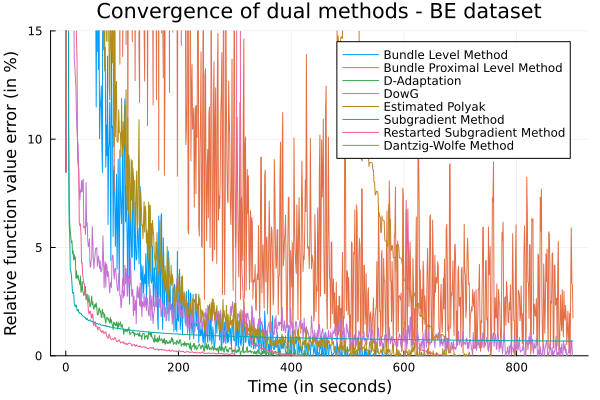

In [13]:
plot(RANGE, aggregateBLM, label = "Bundle Level Method", ylims=(0,15))
plot!(RANGE, aggregateBPLM, label = "Bundle Proximal Level Method")
plot!(RANGE, aggregateDA, label = "D-Adaptation")
plot!(RANGE, aggregateDOWG, label = "DowG")
plot!(RANGE, aggregateESTPOL, label = "Estimated Polyak")
plot!(RANGE, aggregateSUBG, label = "Subgradient Method")
plot!(RANGE, aggregateRSG, label = "Restarted Subgradient Method")
plot!(RANGE, aggregateCG, label = "Dantzig-Wolfe Method")
plot!(xlabel = "Time (in seconds)", ylabel = "Relative function value error (in %)", title = "Convergence of dual methods - BE dataset")
# savefig("dualBEaggregation_scaled.pdf")

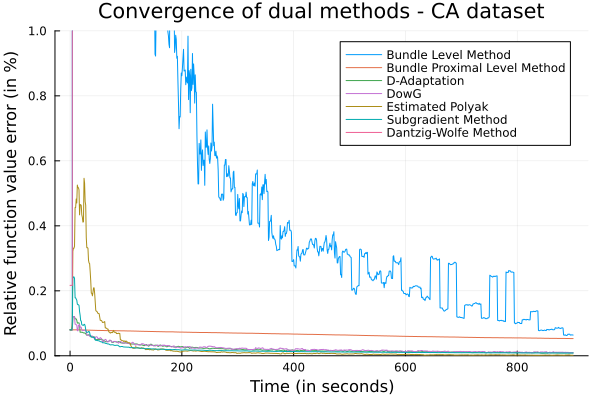

In [171]:
plot(RANGE, aggregateCABLM, label = "Bundle Level Method", ylims=(0,1))
plot!(RANGE, aggregateCABPLM, label = "Bundle Proximal Level Method")
plot!(RANGE, aggregateCADA, label = "D-Adaptation")
plot!(RANGE, aggregateCADOWG, label = "DowG")
plot!(RANGE, aggregateCAESTPOL, label = "Estimated Polyak")
plot!(RANGE, aggregateCASUBG, label = "Subgradient Method")
plot!(RANGE, aggregateCACG, label = "Dantzig-Wolfe Method")
plot!(xlabel = "Time (in seconds)", ylabel = "Relative function value error (in %)", title = "Convergence of dual methods - CA dataset")
# savefig("dualCAaggregation_scaled.pdf")

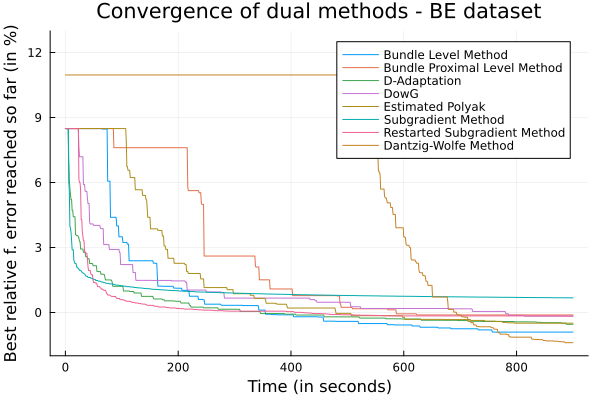

In [16]:
plot(RANGE,  make_it_monotone(aggregateBLM), label = "Bundle Level Method", ylims=(-2,13))
plot!(RANGE, make_it_monotone(aggregateBPLM), label = "Bundle Proximal Level Method")
plot!(RANGE, make_it_monotone(aggregateDA), label = "D-Adaptation")
plot!(RANGE, make_it_monotone(aggregateDOWG), label = "DowG")
plot!(RANGE, make_it_monotone(aggregateESTPOL), label = "Estimated Polyak")
plot!(RANGE, make_it_monotone(aggregateSUBG), label = "Subgradient Method")
plot!(RANGE, make_it_monotone(aggregateRSG), label = "Restarted Subgradient Method")
plot!(RANGE, make_it_monotone(aggregateCG), label = "Dantzig-Wolfe Method")
plot!(xlabel = "Time (in seconds)", ylabel = "Best relative f. error reached so far (in %)", title = "Convergence of dual methods - BE dataset")
# savefig("dualBEaggregation_best.pdf")

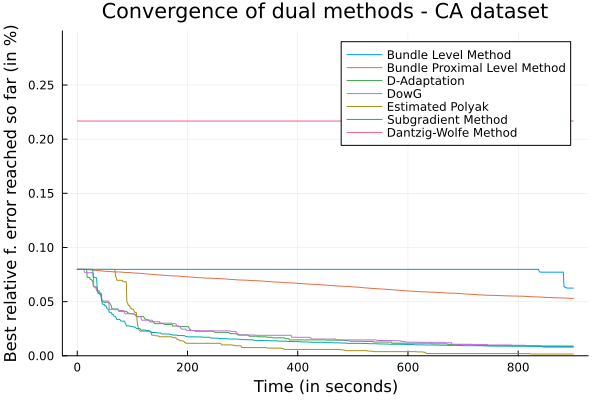

In [173]:
plot(RANGE,  make_it_monotone(aggregateCABLM), label = "Bundle Level Method", ylims=(0,0.3))
plot!(RANGE, make_it_monotone(aggregateCABPLM), label = "Bundle Proximal Level Method")
plot!(RANGE, make_it_monotone(aggregateCADA), label = "D-Adaptation")
plot!(RANGE, make_it_monotone(aggregateCADOWG), label = "DowG")
plot!(RANGE, make_it_monotone(aggregateCAESTPOL), label = "Estimated Polyak")
plot!(RANGE, make_it_monotone(aggregateCASUBG), label = "Subgradient Method")
plot!(RANGE, make_it_monotone(aggregateCACG), label = "Dantzig-Wolfe Method")
plot!(xlabel = "Time (in seconds)", ylabel = "Best relative f. error reached so far (in %)", title = "Convergence of dual methods - CA dataset")
# savefig("dualCAaggregation_best.pdf")

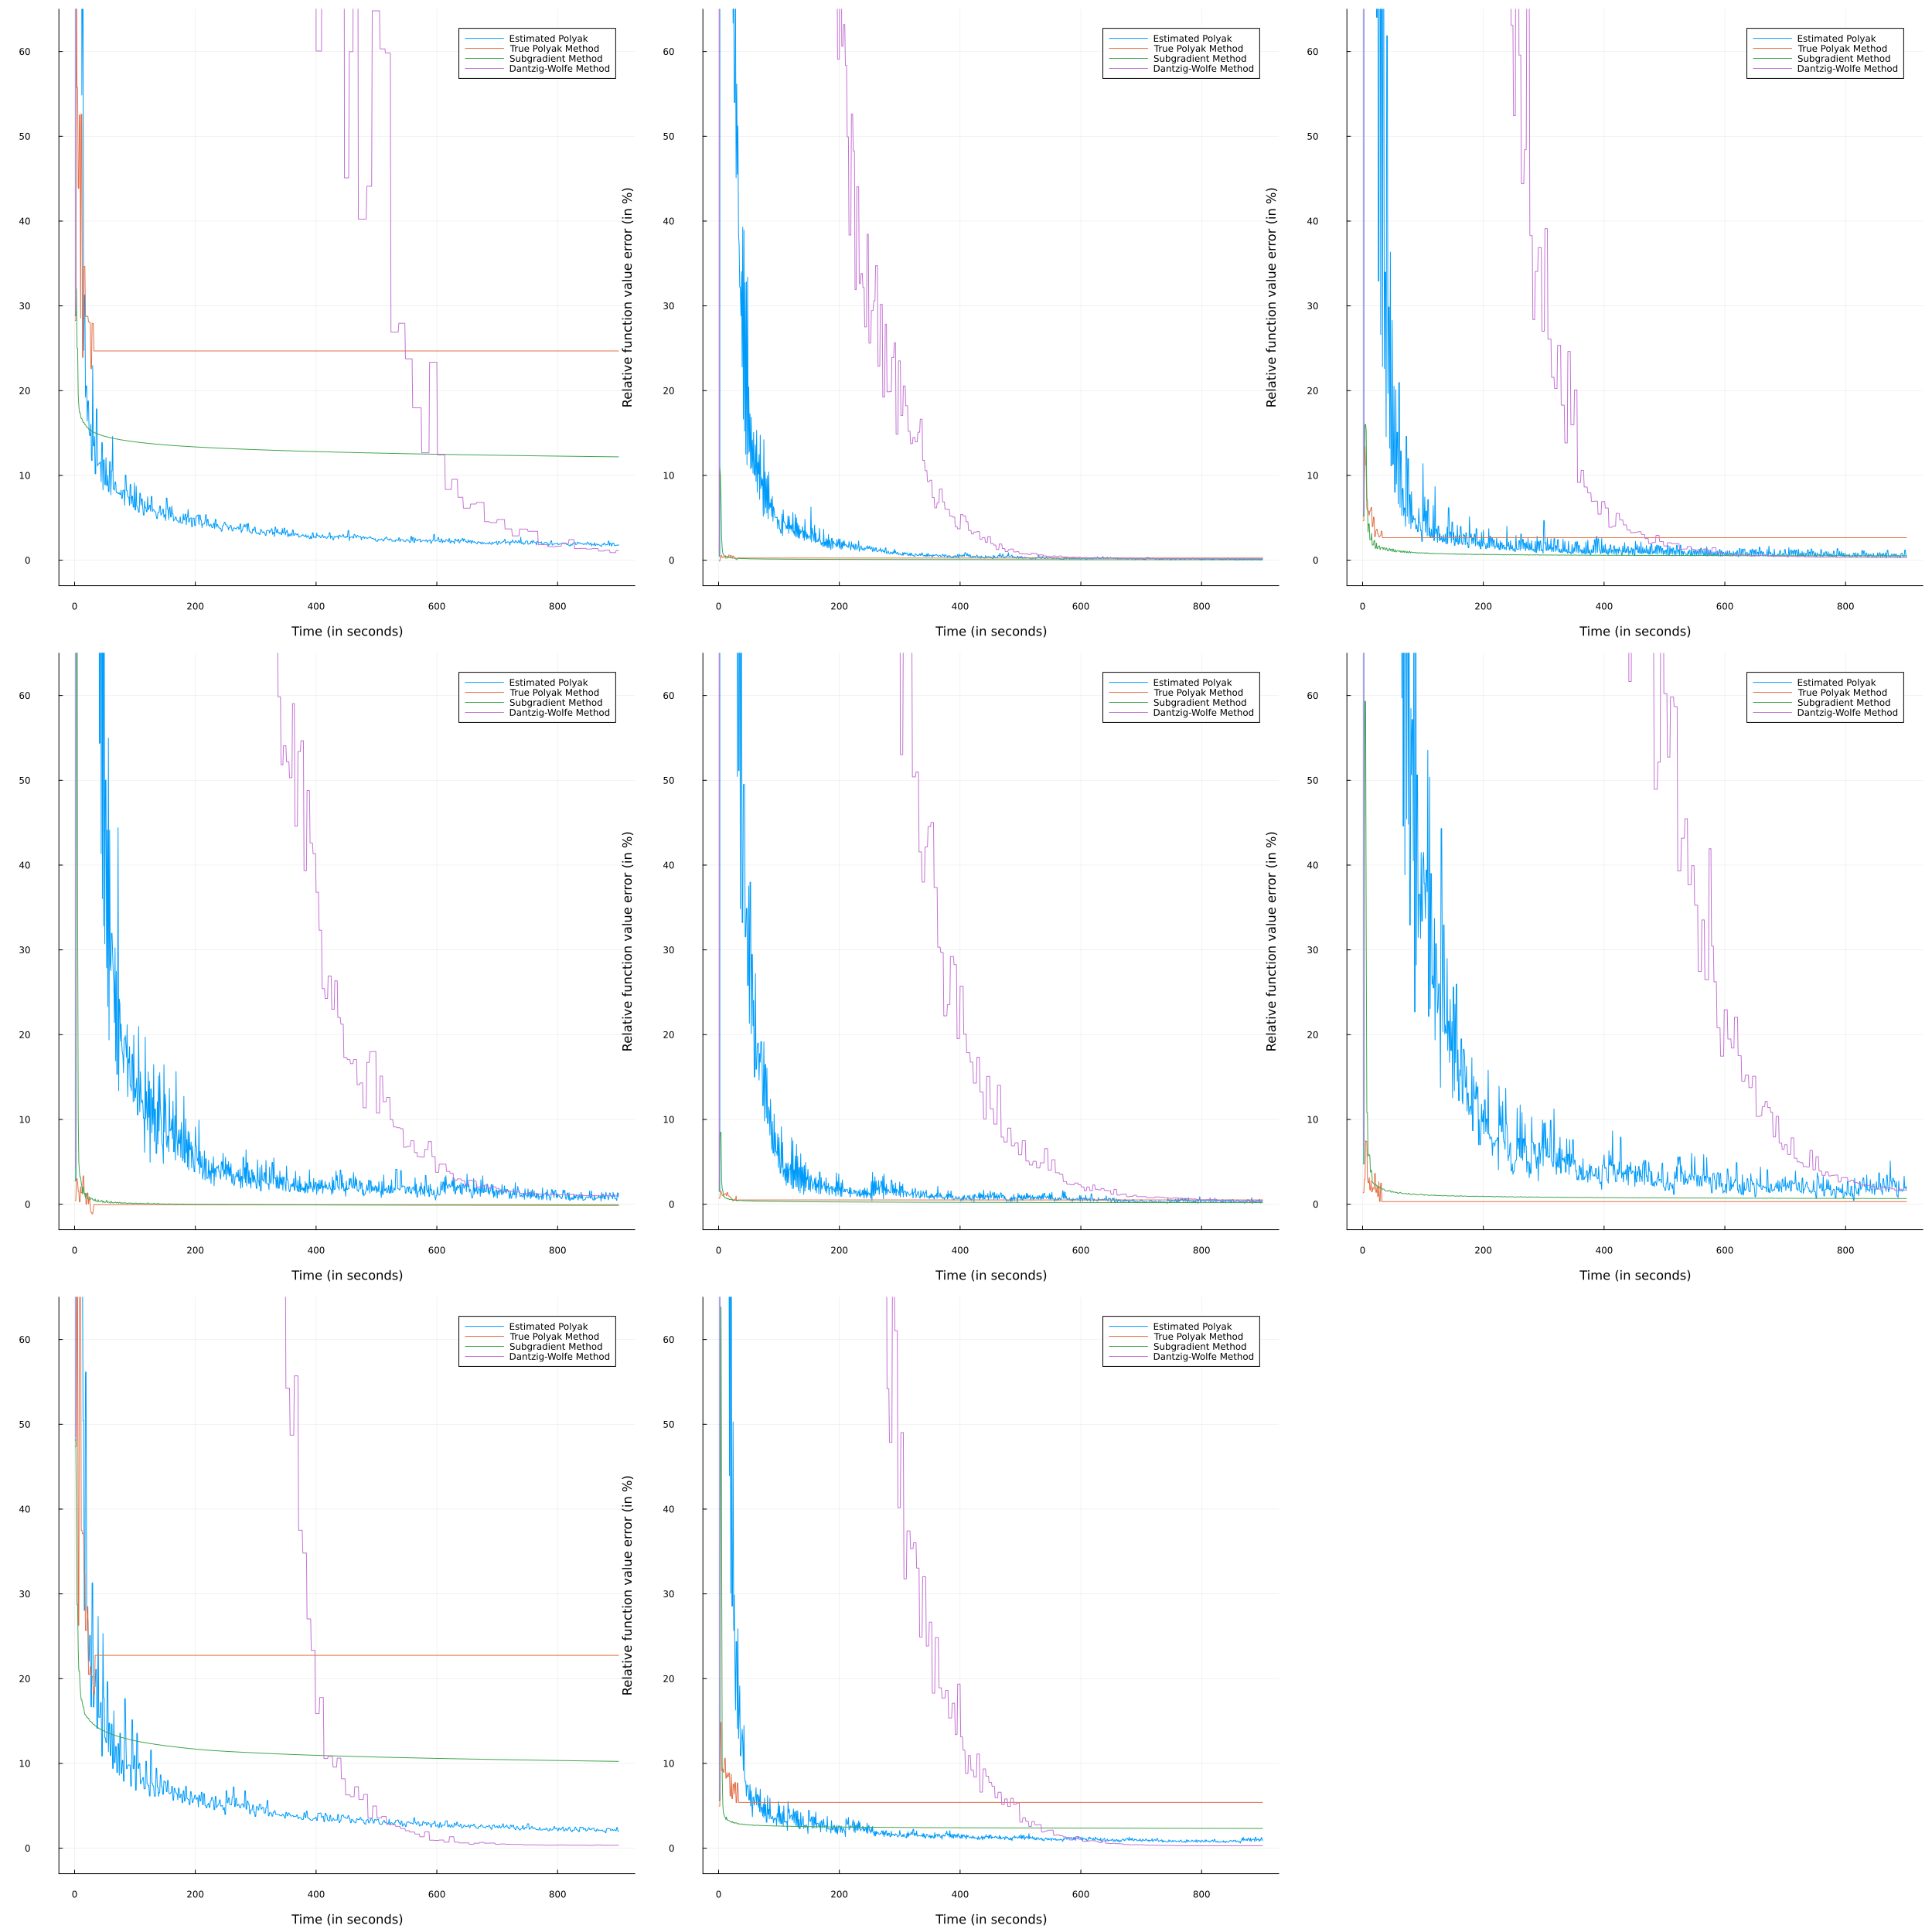

In [195]:
plot(plotmatrixBLM, label ="Bundle Level Method", layout = 8, ylims = (0, 15), size = (2500, 2500))
plot!(plotmatrixBPLM, label ="Bundle Proximal Level Method", layout = 8)
plot!(plotmatrixDA, label ="D-Adaptation", layout = 8)
plot!(plotmatrixDOWG, label ="DowG", layout = 8)
plot(plotmatrixESTPOL, label ="Estimated Polyak", layout = 8, ylims = (-3, 65), size = (2500, 2500))
plot!(plotmatrixSUBG, label ="Subgradient Method", layout = 8)
plot!(plotmatrixCG, label ="Dantzig-Wolfe Method", layout = 8)
plot!(xlabel = "Time (in seconds)", ylabel = "Relative function value error (in %)")
# savefig("BE_all_subplots.pdf")

In [168]:
plot(plotmatrixCABLM, label ="Bundle Level Method", layout = 20, ylims = (-1, 0.3), size = (5000, 4000))
plot!(plotmatrixCABPLM, label ="Bundle Proximal Level Method", layout = 20)
plot!(plotmatrixCADA, label ="D-Adaptation", layout = 20)
plot!(plotmatrixCADOWG, label ="DowG", layout = 20)
plot!(plotmatrixCAESTPOL, label ="Estimated Polyak", layout = 20)
plot!(plotmatrixCASUBG, label ="Subgradient Method", layout = 20)
plot!(plotmatrixCACG, label ="Dantzig-Wolfe Method", layout = 20)
plot!(xlabel = "Time (in seconds)", ylabel = "Relative function value error (in %)")
savefig("CA_all_subplots.pdf")

"c:\\Users\\Sofiane\\Desktop\\ConvexHullPricing\\results\\CA_all_subplots.pdf"